# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 4.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
286016,0.9985,0.0928,0.0854,0.0024,0.0269,0.1318,0.3882,0.4395,0.1392,0.1489,6,6,5,5
305475,0.4907,0.0439,0.0024,0.0024,0.0024,0.0244,0.1196,0.1807,0.0366,0.0928,6,6,7,7
122308,0.3271,0.7666,0.1489,0.0146,0.0684,0.2539,0.8081,0.3271,0.4956,0.3345,6,6,3,3
273785,0.0269,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,0.0024,0.0146,0,0,0,0
182166,0.2124,0.0781,0.0073,0.0024,0.0024,0.0220,0.0464,0.1465,0.0293,0.0879,7,7,10,10


In [3]:
raw_data.shape

(455868, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455868 entries, 0 to 455867
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          455868 non-null  float64
 1   Emg2          455868 non-null  float64
 2   Emg3          455868 non-null  float64
 3   Emg4          455868 non-null  float64
 4   Emg5          455868 non-null  float64
 5   Emg6          455868 non-null  float64
 6   Emg7          455868 non-null  float64
 7   Emg8          455868 non-null  float64
 8   Emg9          455868 non-null  float64
 9   Emg10         455868 non-null  float64
 10  repetition    455868 non-null  int64  
 11  rerepetition  455868 non-null  int64  
 12  stimulus      455868 non-null  int64  
 13  restimulus    455868 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.7 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000,455868.000000
mean,0.332545,0.058456,0.049844,0.023382,0.009703,0.035887,0.191725,0.173032,0.070132,0.065993,3.237610,2.511964,5.738133,4.701942
std,0.467568,0.142487,0.139377,0.102822,0.028035,0.069141,0.267717,0.180930,0.153322,0.110593,3.490469,3.337748,6.599320,6.493878
min,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022000,0.002400,0.002400,0.002400,0.002400,0.002400,0.014600,0.048800,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.105000,0.002400,0.002400,0.002400,0.002400,0.009800,0.117200,0.112300,0.004900,0.026900,2.000000,0.000000,3.000000,0.000000
75%,0.476100,0.056200,0.024400,0.002400,0.002400,0.039100,0.263700,0.239300,0.083000,0.078100,6.000000,5.000000,10.000000,9.000000
max,4.458000,4.514200,3.064000,3.234900,0.803200,1.042500,4.663100,2.041000,3.513200,1.562500,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     187582
8      15555
12     15514
7      15504
4      15498
2      15497
5      15479
9      15471
6      15468
11     15465
10     15440
1      15430
3      15426
17     10355
14     10338
13     10335
15     10310
16     10267
19      5186
18      5170
21      5164
20      5142
23      5138
22      5134
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

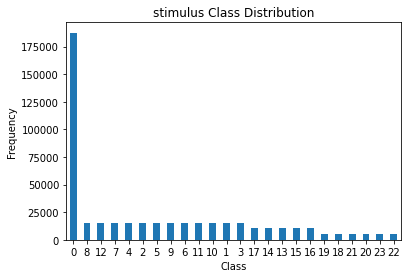

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
203702,0.3784,0.0757,0.4761,0.7495,0.1123,0.0879,0.2563,0.2344,0.1831,0.1025,3,3,13,13
30360,0.1294,0.0317,0.0098,0.0024,0.0024,0.0024,0.1099,0.0854,0.1123,0.0464,0,0,0,0
313110,0.0244,0.0024,0.0024,0.0024,0.0024,0.0024,0.1245,0.1050,0.0024,0.0024,0,0,0,0
129980,1.4453,0.2563,0.1172,0.0293,0.0488,0.1538,1.0303,0.6421,0.2490,0.2734,5,5,4,4
30182,0.3882,0.0586,0.0024,0.0024,0.0024,0.0024,0.1563,0.1245,0.1636,0.0464,0,0,0,0


In [12]:
raw_data.shape

(385177, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385177 entries, 0 to 455867
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          385177 non-null  float64
 1   Emg2          385177 non-null  float64
 2   Emg3          385177 non-null  float64
 3   Emg4          385177 non-null  float64
 4   Emg5          385177 non-null  float64
 5   Emg6          385177 non-null  float64
 6   Emg7          385177 non-null  float64
 7   Emg8          385177 non-null  float64
 8   Emg9          385177 non-null  float64
 9   Emg10         385177 non-null  float64
 10  repetition    385177 non-null  int64  
 11  rerepetition  385177 non-null  int64  
 12  stimulus      385177 non-null  int64  
 13  restimulus    385177 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.1 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# Indipendent Component Analysis (ICA)

https://www.nmr.mgh.harvard.edu/mne/0.14/manual/preprocessing/ica.html

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X)

In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

In [20]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred1 = tree.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 73.33973726569396


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     36204
           1       0.64      0.63      0.64      2317
           2       0.60      0.61      0.61      1955
           3       0.64      0.64      0.64      1962
           4       0.61      0.61      0.61      2350
           5       0.58      0.59      0.59      2458
           6       0.60      0.60      0.60      2370
           7       0.53      0.53      0.53      2108
           8       0.63      0.63      0.63      2281
           9       0.59      0.58      0.58      2569
          10       0.58      0.56      0.57      2439
          11       0.61      0.64      0.62      2220
          12       0.51      0.49      0.50      2556
          13       0.67      0.70      0.69      1440
          14       0.54      0.56      0.55      1408
          15       0.62      0.62      0.62      1651
          16       0.62      0.62      0.62      1855
 

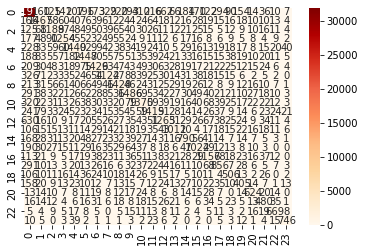

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 2.056441144400021
MSE: 22.993821070668258
RMSE: 4.795187282126555


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.7334108468134835
Recall Score :  0.7333973726569396
f1_score :  0.7333554600129661


# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 85.76639493223948


Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     36204
           1       0.83      0.82      0.82      2317
           2       0.81      0.81      0.81      1955
           3       0.86      0.80      0.83      1962
           4       0.85      0.78      0.82      2350
           5       0.85      0.77      0.81      2458
           6       0.84      0.77      0.80      2370
           7       0.72      0.69      0.71      2108
           8       0.86      0.76      0.81      2281
           9       0.84      0.75      0.79      2569
          10       0.82      0.69      0.75      2439
          11       0.89      0.77      0.82      2220
          12       0.83      0.57      0.68      2556
          13       0.93      0.84      0.88      1440
          14       0.78      0.71      0.74      1408
          15       0.83      0.75      0.78      1651
          16       0.86      0.78      0.82      1855
 

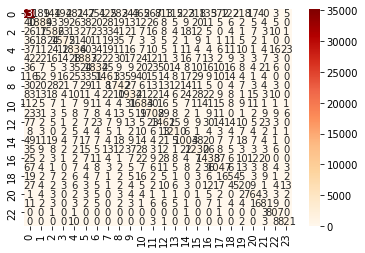

In [29]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1.164403655433823
MSE: 13.38424892258165
RMSE: 3.6584489777201554


In [31]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8563812775046227
Recall Score :  0.8576639493223948
f1_score :  0.8534542752430646


# ExtraTreesClassifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [33]:
y_pred5 = extratree.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 88.1289267355522


Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     36204
           1       0.91      0.84      0.87      2317
           2       0.91      0.83      0.87      1955
           3       0.91      0.84      0.87      1962
           4       0.91      0.82      0.86      2350
           5       0.92      0.80      0.86      2458
           6       0.92      0.81      0.86      2370
           7       0.79      0.73      0.76      2108
           8       0.91      0.80      0.86      2281
           9       0.87      0.79      0.83      2569
          10       0.88      0.73      0.80      2439
          11       0.94      0.80      0.86      2220
          12       0.88      0.62      0.72      2556
          13       0.97      0.85      0.91      1440
          14       0.80      0.76      0.78      1408
          15       0.84      0.79      0.82      1651
          16       0.90      0.84      0.87      1855
 

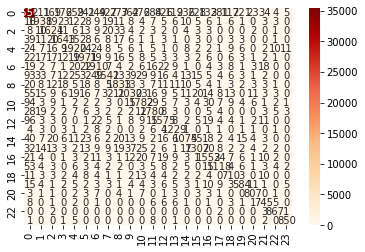

In [35]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 1.0272080585700192
MSE: 12.080819357183655
RMSE: 3.4757473091672897


In [37]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.8831178999437906
Recall Score :  0.881289267355522
f1_score :  0.8782475585546642


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 86.78020665662807


Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     36204
           1       0.87      0.80      0.83      2317
           2       0.87      0.80      0.83      1955
           3       0.89      0.81      0.85      1962
           4       0.88      0.79      0.83      2350
           5       0.89      0.78      0.83      2458
           6       0.89      0.78      0.83      2370
           7       0.76      0.71      0.74      2108
           8       0.89      0.79      0.83      2281
           9       0.84      0.75      0.79      2569
          10       0.85      0.71      0.77      2439
          11       0.91      0.78      0.84      2220
          12       0.85      0.59      0.70      2556
          13       0.94      0.85      0.89      1440
          14       0.77      0.73      0.75      1408
          15       0.83      0.78      0.80      1651
          16       0.87      0.82      0.84      1855
 

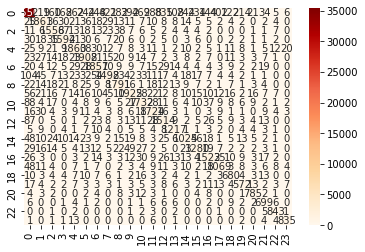

In [41]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 1.1081182823614932
MSE: 12.885547016979075
RMSE: 3.5896444137238825


In [43]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.8680113603740263
Recall Score :  0.8678020665662807
f1_score :  0.8639072339506583


# XGBoost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [45]:
y_pred4 = xgb.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 79.88343112311127


Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     36204
           1       0.76      0.68      0.72      2317
           2       0.70      0.64      0.67      1955
           3       0.75      0.68      0.71      1962
           4       0.77      0.64      0.70      2350
           5       0.74      0.60      0.66      2458
           6       0.78      0.63      0.70      2370
           7       0.62      0.61      0.61      2108
           8       0.75      0.67      0.71      2281
           9       0.68      0.59      0.63      2569
          10       0.74      0.59      0.66      2439
          11       0.80      0.66      0.72      2220
          12       0.77      0.48      0.59      2556
          13       0.82      0.72      0.77      1440
          14       0.64      0.63      0.64      1408
          15       0.73      0.68      0.70      1651
          16       0.75      0.68      0.71      1855
 

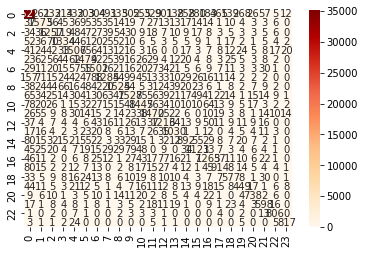

In [47]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [48]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.5589205046991017
MSE: 17.660249753362063
RMSE: 4.202409993487316


In [49]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.7923848910846412
Recall Score :  0.7988343112311127
f1_score :  0.7903995018609753
